In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the dataset 'mobile_sales'

In [2]:
data_raw = pd.read_csv('mobile_sales.csv', 
                      na_values=':')

In [3]:
data_raw.head(10)

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online
5,f7e98db9-cb87-453e-8179-e48ba5443932,2024-03-07,idea,"Massey, Nicholson and Young",1498.13,70,9703.89,45,Female,Port Daryl,Debit Card
6,61f1c03f-5527-49bf-88f6-0d8694e72d41,2024-07-13,southern,Coleman-Pena,975.77,63,8300.22,23,Other,Kathrynborough,Online
7,55d74ccb-e3c0-4ceb-a102-6d553736b944,2024-03-18,top,"Brock, Cruz and Santiago",530.70,79,4515.80,26,Female,Kyleborough,Online
8,889bd479-e06a-494d-baae-e099bea5469c,2024-04-12,anything,"Griffin, Boyle and Dawson",178.52,58,36150.93,20,Female,Jacquelinestad,Debit Card
9,567c276b-fec4-47e4-b5be-71f2b79bd745,2024-04-19,wall,"Arroyo, Jones and Clayton",774.79,92,24228.27,33,Male,South Jessicachester,Online


In [4]:
total_records = len(data_raw)
total_records

1000

The dataset has 1000 records made in the year 2024 from January to August

In [5]:
print("The dataset has columns:")
for cols in data_raw.columns:
    print(cols)

The dataset has columns:
TransactionID
Date
MobileModel
Brand
Price
UnitsSold
TotalRevenue
CustomerAge
CustomerGender
Location
PaymentMethod


### Checking for missing data missing data
Finding the number of records with missing data in the dataset

In [6]:
miss_count = data_raw.isnull().sum()
print('Missing values: ')
miss_count

Missing values: 


TransactionID     0
Date              0
MobileModel       0
Brand             0
Price             0
UnitsSold         0
TotalRevenue      0
CustomerAge       0
CustomerGender    0
Location          0
PaymentMethod     0
dtype: int64

### Exploratory Data Analysis 

Display dataset info and missing values

In [7]:
print("Dataset Info:")
print(data_raw.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   1000 non-null   object 
 1   Date            1000 non-null   object 
 2   MobileModel     1000 non-null   object 
 3   Brand           1000 non-null   object 
 4   Price           1000 non-null   float64
 5   UnitsSold       1000 non-null   int64  
 6   TotalRevenue    1000 non-null   float64
 7   CustomerAge     1000 non-null   int64  
 8   CustomerGender  1000 non-null   object 
 9   Location        1000 non-null   object 
 10  PaymentMethod   1000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB
None


Checking and making sure that each column has a matching data type with the values it holds

In [8]:
data_raw['Date'] = pd.to_datetime(data_raw['Date'])

str_columns = ['TransactionID', 'MobileModel', 'Brand', 'CustomerGender', 'Location']
data_raw[str_columns] = data_raw[str_columns].astype(str)

int_columns = ['UnitsSold', 'CustomerAge']
data_raw[int_columns] = data_raw[int_columns].astype(int)

data_raw['TotalRevenue'] = data_raw['TotalRevenue'].astype(float)

print("\nData Types: ")
print(data_raw.dtypes)


Data Types: 
TransactionID             object
Date              datetime64[ns]
MobileModel               object
Brand                     object
Price                    float64
UnitsSold                  int32
TotalRevenue             float64
CustomerAge                int32
CustomerGender            object
Location                  object
PaymentMethod             object
dtype: object


In [9]:
data_raw.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online


### Visualisations showing some relationships between variables in the dataset
Plotting the distribution of price

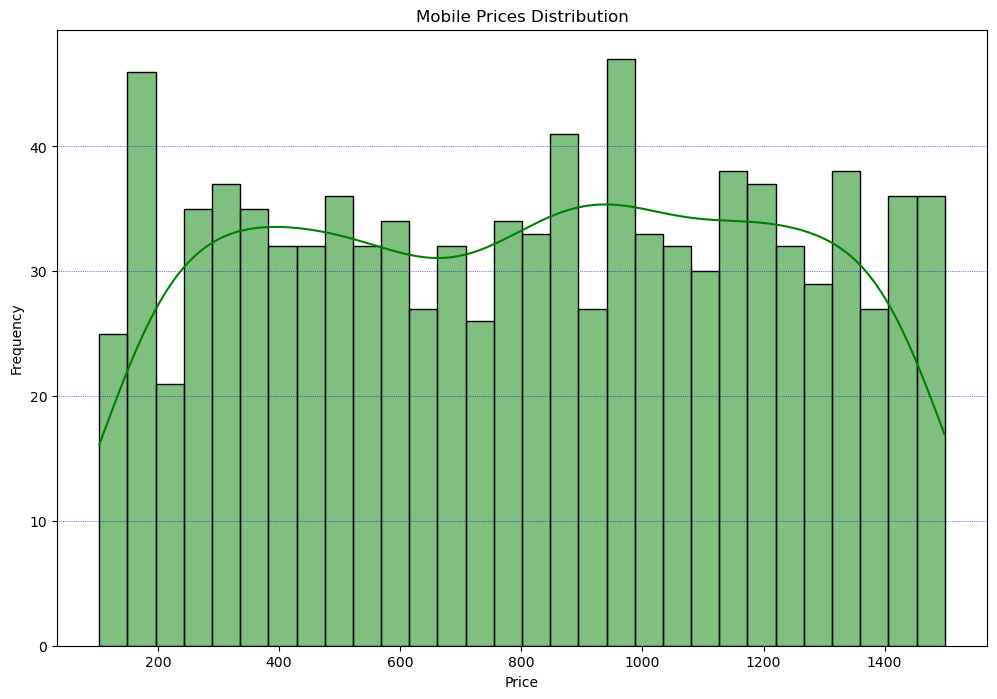

In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(data_raw['Price'], bins=30, kde=True, color='green')
plt.grid(axis='y', linestyle=':', linewidth=0.5, color='blue') 
plt.title('Mobile Prices Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

Plot distribution of how sales were affected by Gender

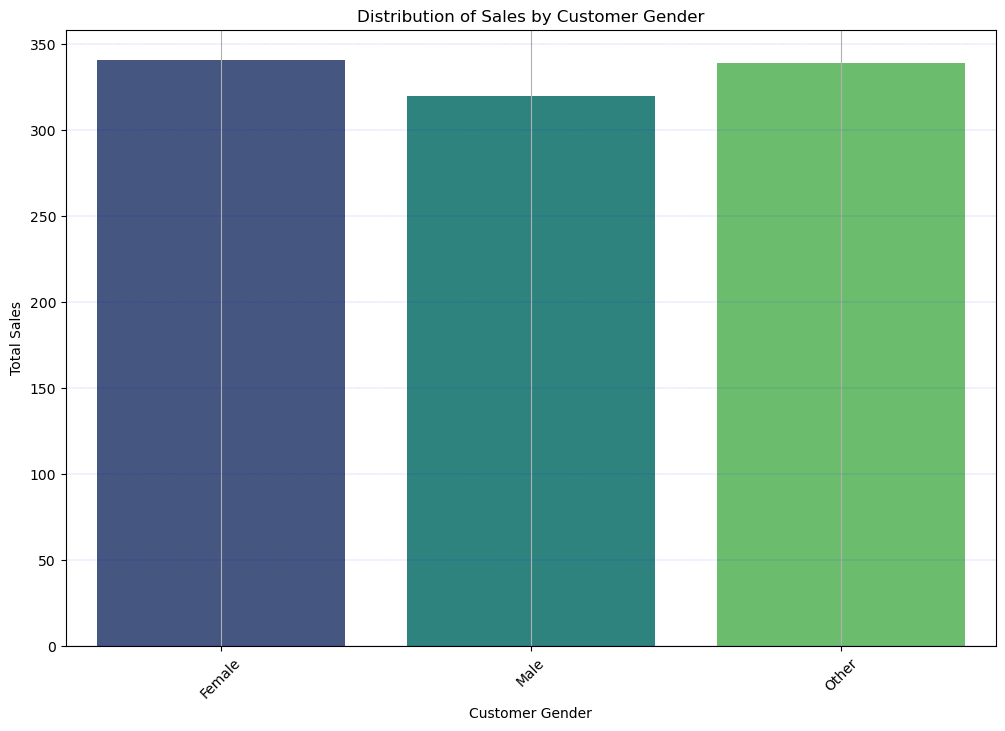

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data_raw, x='CustomerGender', palette='viridis')
plt.grid(axis='y', linestyle=':', linewidth=0.2, color='blue') 
plt.title('Distribution of Sales by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Categorizing prices and visualizing the total sales of each category 

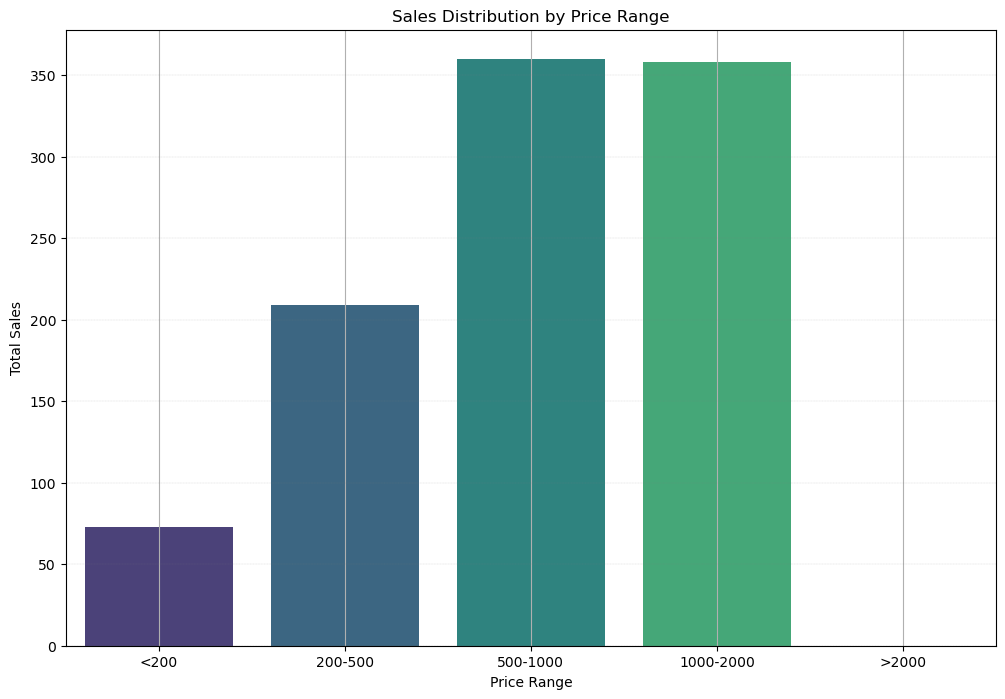

In [12]:
bins = [0, 200, 500, 1000, 2000, np.inf]
labels = ['<200', '200-500', '500-1000', '1000-2000', '>2000']
data_raw['PriceRange'] = pd.cut(data_raw['Price'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
sns.countplot(data=data_raw, x='PriceRange', palette='viridis')
plt.grid(axis='y', linestyle=':', linewidth=0.2, color='gray') 
plt.title('Sales Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

How the branding affects the total sales and revenue of the mobile phones

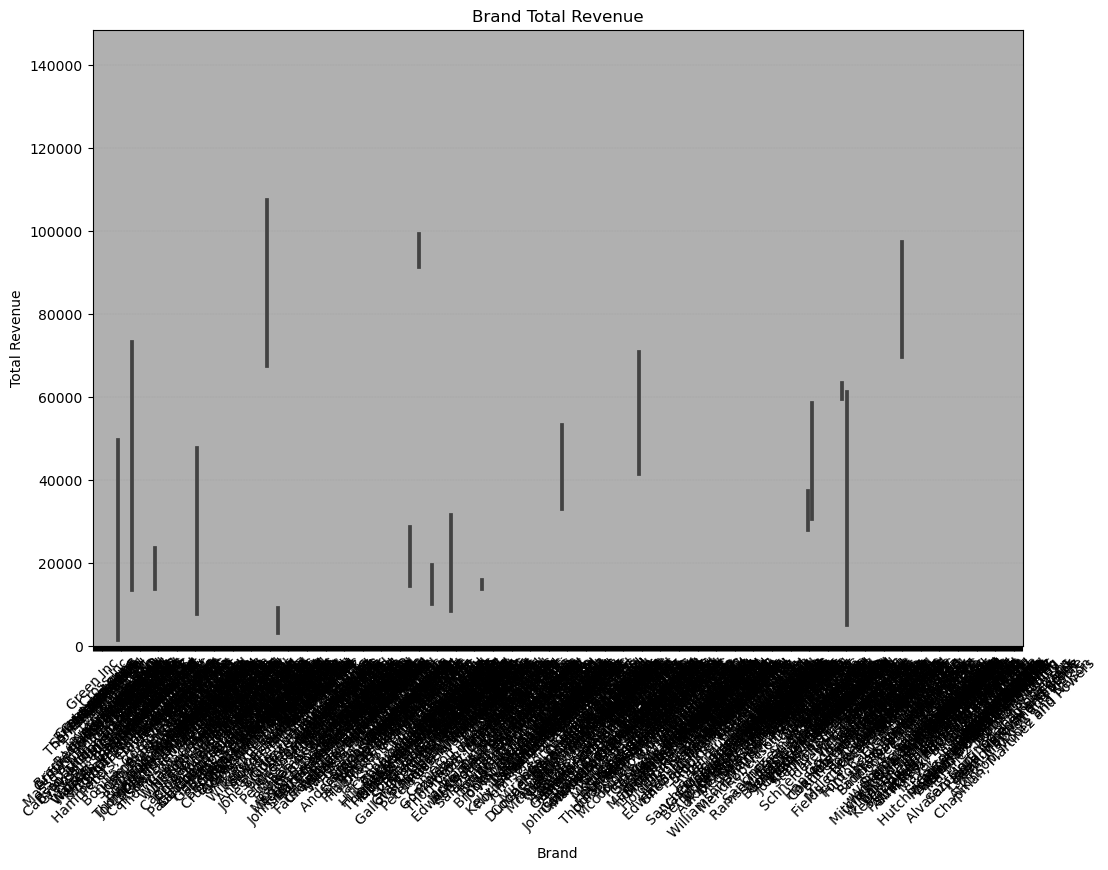

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_raw, x='Brand', y='TotalRevenue', palette='viridis')
plt.grid(axis='y', linestyle=':', linewidth=0.2, color='gray') 
plt.title('Brand Total Revenue')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Comparison of how payment methods contributed to the total revenue of the business

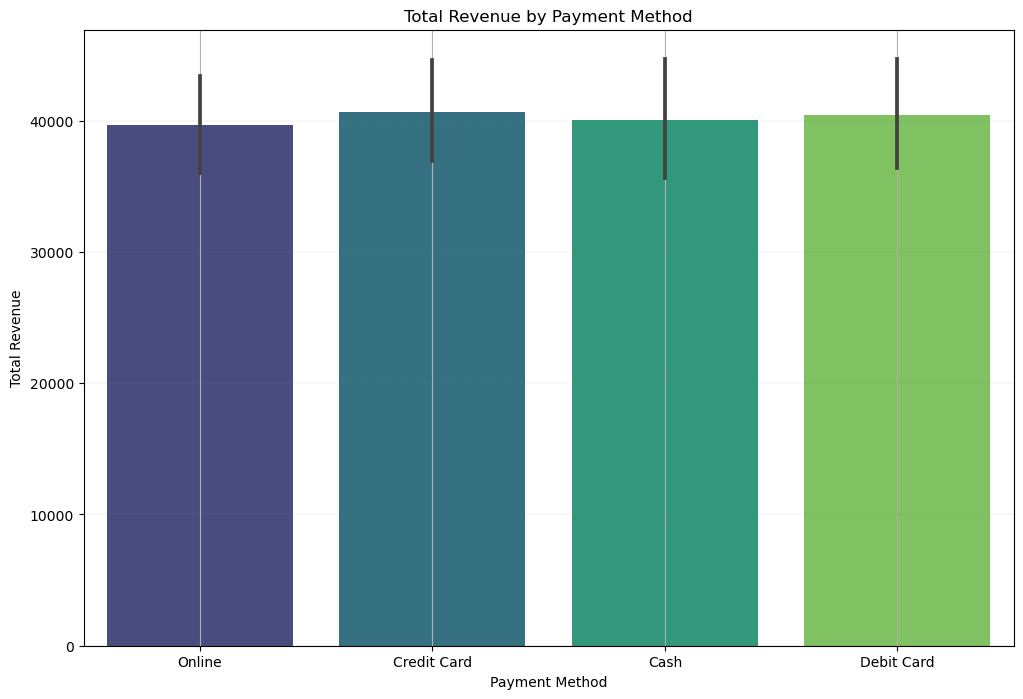

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_raw, x='PaymentMethod', y='TotalRevenue', palette='viridis')
plt.grid(axis='y', linestyle=':', linewidth=0.2, color='gray')
plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

Customer age distribution

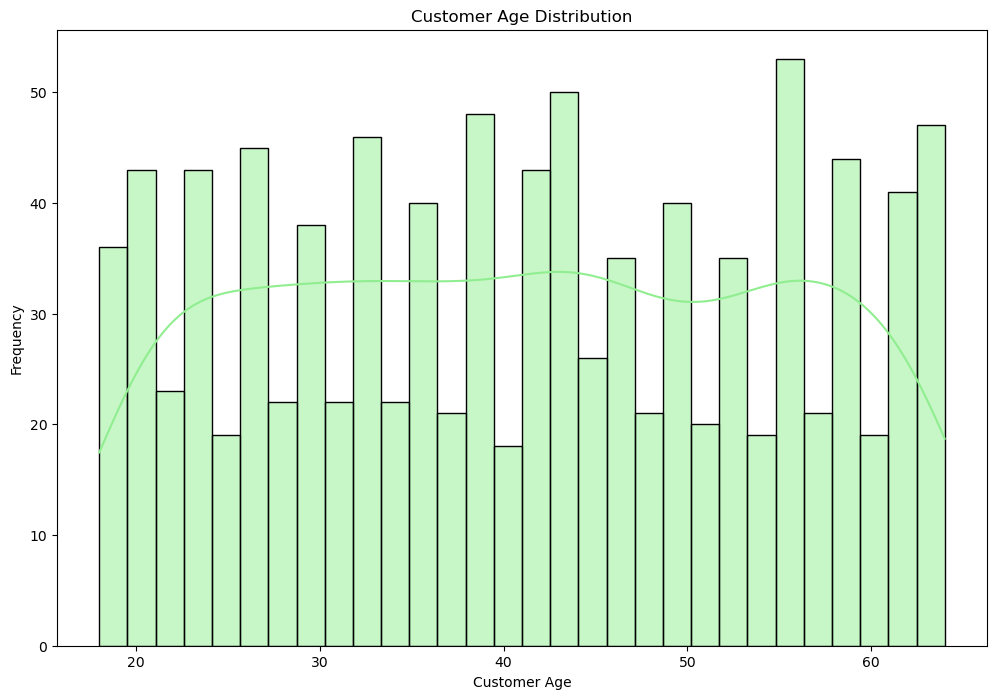

In [15]:
plt.figure(figsize=(12, 8))
sns.histplot(data_raw['CustomerAge'], bins=30, kde=True, color='lightgreen')
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

How sales change over time

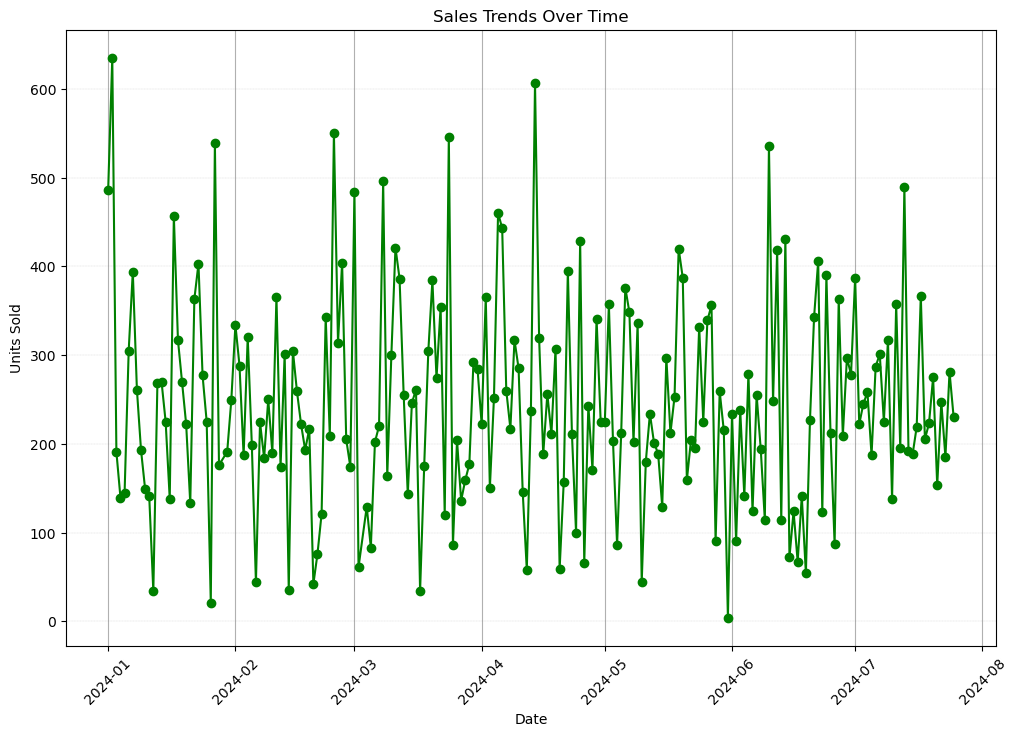

In [16]:
plt.figure(figsize=(12, 8))
sales_trends = data_raw.groupby('Date').agg({'UnitsSold': 'sum'}).reset_index()
plt.plot(sales_trends['Date'], sales_trends['UnitsSold'], marker='o', color='green')
plt.grid(axis='y', linestyle=':', linewidth=0.2, color='gray')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

How the Mobile model contributed to the total revenue

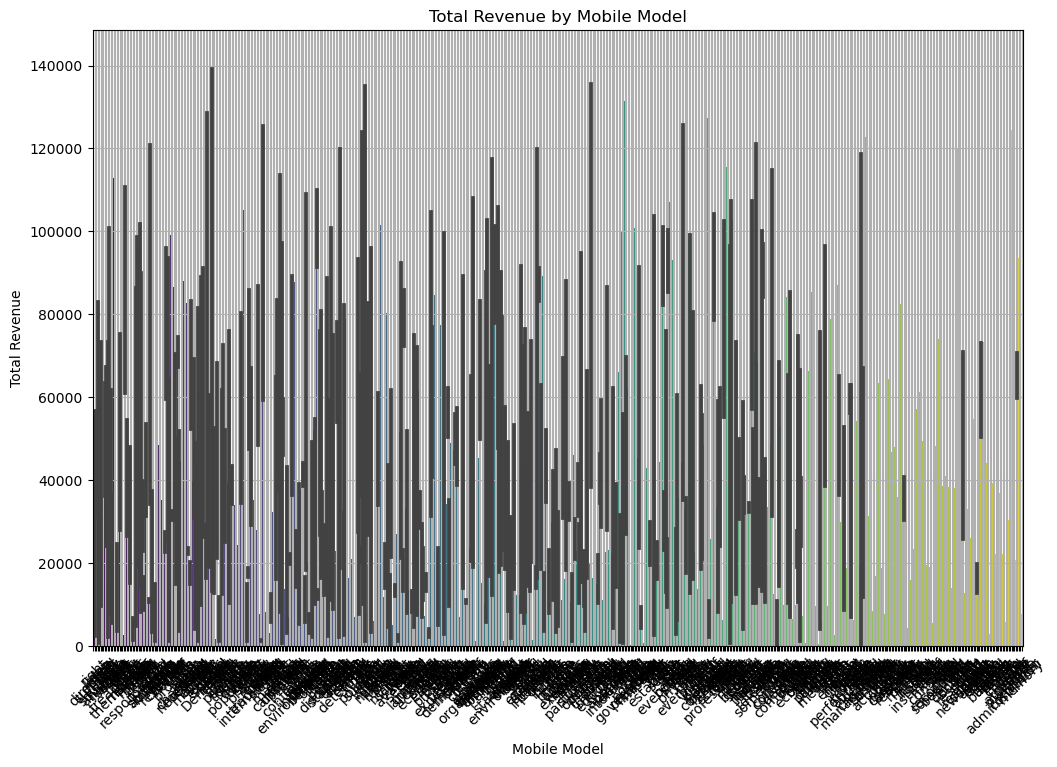

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_raw, x='MobileModel', y='TotalRevenue', palette='viridis')
plt.title('Total Revenue by Mobile Model')
plt.xlabel('Mobile Model')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

How each Location contributes to the total revenue of the Company 

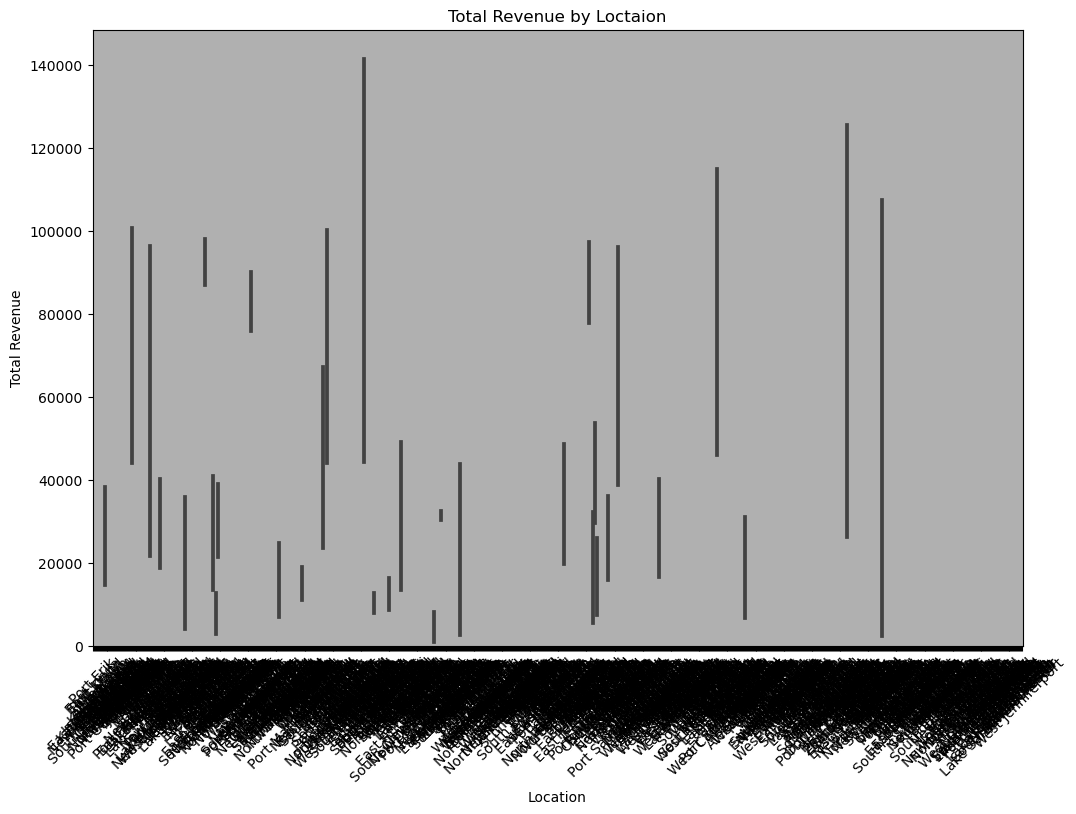

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_raw, x='Location', y='TotalRevenue', palette='viridis')
plt.title('Total Revenue by Loctaion')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()